# Análisis y Visualización de Datos
## Trabajo práctico entregable - Grupo 30: Di Bartolo, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Ejercicio 1 - Análisis descriptivo](#Ejercicio1)
    * [Primer tratamiento del dataset](#Tratamiento1)
    * [Selección de columnas de interés](#Selección)
    * [Análisis de columnas de interés](#Análisis1)
    * [Segundo tratamiento del dataset](#Tratamiento2)
    * [Análisis de los datos tratados](#Análisis2)
    * [Conclusiones](#Conclusiones)

#### Librerías externas <a class="anchor" id="Libs"></a>
---

Empezamos cargando librerías que vamos a usar en la resolución del ejercicio.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn
import math

# Seteamos que queremos ver todas las columnas cuando mostremos un dataframe.
pd.set_option('display.max_columns', None)

### Ejercicio 1 - Análisis descriptivo <a class="anchor" id="Ejercicio1"></a>

A partir del dataset de la encuesta de [Sysarmy en Argentina para el año 2020](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2020-2/) responda: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

#### Primer tratamiento del dataset <a class="anchor" id="Tratamiento1"></a>
---
El primer paso para responder la pregunta es descargar los datos y darles un pequeño tratamiento para que tengan el formato deseado. Esto se hizo en un notebook anteriormente, pero igual parece ser importante mencionar los cambios que se hicieron sobre el dataset original:
- Se borraron las primeras 8 filas para que la primer fila sea aquella con los nombres de la columna.
- Se renombraron las columnas para comodidad en el futuro manejo de datos.

El dataset procesado se descarga en formato *csv*. Por comodidad los profesores de la diplomatura lo subieron al servidor de la Universidad, así que desde allí tomaremos los datos.

In [2]:
# La dirección donde está alojado el data set.
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'

# Mediante este método pandas lee un archivo de texto con valores separados por comas 
# y lo transforma en un data frame
df = pd.read_csv(url)

# Para mostrar los nombres de las columnas y las primeras dos respuestas descomentar lo siguiente.
#df[:2]

#### Selección de columnas de interés <a class="anchor" id="Selección"></a>
---

Los datos que tenemos disponibles para cada respuesta son muy variados, van desde la edad hasta los beneficios extra que tienen en la empresa donde se desempeñan.

La pregunta a responder para este ejercicio es sobre qué lenguajes de programación están asociados a los mejores salarios. Un primer enfoque puede ser entonces usar sólo las dos columnas que contienen esta información. Sin embargo, para poder hacer un poco más rico el estudio vamos a considerar también la edad y el género de quien respondió.

Entonces, las columnas consideradas relevantes serán:
- **profile_gender**: género que autopercibe quien responde la encuesta.
- **profile_age**: edad de quien responde la encuesta.
- **profile_studies_level**: nivel de estudios alcanzado (que se tenga incompleto, en curso o completo).

- **salary_monthly_NETO**: el salario que efectivamente recibe el empleado luego de haber pagado los impuestos.
- **tools_programming_languages**: los lenguajes de programación con los que trabaja la persona. Si no los utiliza la respuesta será *Ninguno*, y si son más de uno estarán separados por comas.

#### Análisis de columnas de interés <a class="anchor" id="Análisis1"></a>
---

Vamos a analizar rápidamente el contenido de cada una de estas columnas. Esto quiere decir que queremos saber aproximadamente qué tipo de respuestas hay, por ejemplo, en **profile_gender**. También se desprenderá si debemos hacer algún tratamiento adicional sobre ellas.

In [3]:
print("Las opciones posibles en profile_gender son: ",df['profile_gender'].unique()[0],", ",df['profile_gender'].unique()[1]," y ",df['profile_gender'].unique()[2] , ".\n",sep="")

print("Las edad mínima en profile_age es:",df['profile_age'].min(),"años.")
print("Las edad máxima en profile_age es:",df['profile_age'].max(),"años.")
print("Las edad máxima (que no es un error de tipeo) en profile_age es:"\
      ,math.ceil(df['profile_age'].quantile(99.96 / 100)),"años. \n")

print("Las opciones posibles en profile_studies_level son:")
print("\t -",df['profile_studies_level'].unique()[6])
print("\t -",df['profile_studies_level'].unique()[1])
print("\t -",df['profile_studies_level'].unique()[3])
print("\t -",df['profile_studies_level'].unique()[0])
print("\t -",df['profile_studies_level'].unique()[2])
print("\t -",df['profile_studies_level'].unique()[4])
print("\t -",df['profile_studies_level'].unique()[5],"\n")

print("El salario mensual neto en salary_monthly_NETO va desde AR$", \
      int(df['salary_monthly_NETO'].min()),"hasta AR$", int(df['salary_monthly_NETO'].max()), "\n")

print("Podemos ver que en tools_programming_languages hay una variedad muy grande de respuestas \
    porque son una combinación de respuestas posibles, por ejemplo:")

print("\t -",df['tools_programming_languages'].unique()[0])
print("\t -",df['tools_programming_languages'].unique()[1])
print("\t -",df['tools_programming_languages'].unique()[2])
print("\t -",df['tools_programming_languages'].unique()[3], "\n")

print("Tenemos que resolver esto antes de seguir.")

Las opciones posibles en profile_gender son: Mujer, Hombre y Otros.

Las edad mínima en profile_age es: 18 años.
Las edad máxima en profile_age es: 52000 años.
Las edad máxima (que no es un error de tipeo) en profile_age es: 67 años. 

Las opciones posibles en profile_studies_level son:
	 - Primario
	 - Secundario
	 - Terciario
	 - Universitario
	 - Posgrado
	 - Doctorado
	 - Posdoctorado 

El salario mensual neto en salary_monthly_NETO va desde AR$ 1 hasta AR$ 2080000 

Podemos ver que en tools_programming_languages hay una variedad muy grande de respuestas     porque son una combinación de respuestas posibles, por ejemplo:
	 - Ninguno
	 - HTML, Javascript, Python
	 - Bash/Shell, C, CSS, HTML, Java, Javascript, PHP, Python, SQL
	 - CSS, HTML, Javascript, SQL, TypeScript 

Tenemos que resolver esto antes de seguir.


Lo primero será entonces separar estos lenguajes de programación separados por comas para poder trabajarlos. Para esto los profesores de la diplomatura nos facilitaron un código que se encarga justamente de eso y nos crea un nuevo dataframe.

*Nos tomamos al final una pequeña libertad artística para poder ajustar un tema de los índices del dataframe resultante.*

In [4]:
# Columnas que consideramos de interés.
relevant_columns = ['profile_gender', 'profile_age', 'profile_studies_level', 'salary_monthly_NETO','salary_monthly_BRUTO', 'tools_programming_languages']
,
# Esta función convierte los lenguajes de programación separados por comas
# en formato string hacia una lista de lenguajes de programación.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Quita la opción ninguno de los anteriores.
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Separa el string para crear una lista. Les quita los espacios y las comas.
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Crea una nueva columna con la lista procesada de lenguajes
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
# La agregamos a la lista de columnas relevantes.
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Vamos a tener una fila en el dataframe por cada lenguaje de programación que
# maneja cada respuesta.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

# Acá hacemos unas cositas para solucionar un problema de index que aparece repetido.
df_lang = df_lang.reset_index()
df_lang = df_lang.drop('index', 1)

# Descomentanto la siguiente linea,  vemos las primeras filas de nuestro nuevo dataframe tratado.
#df_lang[:5]

/var/folders/0b/tqp6hx2n3pqcpv6qt7zrhdqh0000gn/T/ipykernel_33975/152305920.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lang = df.cured_programming_languages\
/var/folders/0b/tqp6hx2n3pqcpv6qt7zrhdqh0000gn/T/ipykernel_33975/152305920.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_lang = df_lang.drop('index', 1)


Continuando con el análisis de los lenguajes de programación, si listamos los diferentes tipos de lenguajes de programación vamos a ver que hay 205 opciones distintas. Haciendo uso del [Principio de Pareto](https://es.wikipedia.org/wiki/Principio_de_Pareto), vamos a concentrarnos en los lenguajes que signifiquen el 80% de las respuestas, dejando de lado los casos particulares.

Con tan solo 11 lenguajes de programación tenemos más del 80% de las respuestas.

In [5]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Cantidad de lenguajes de programación distintos.
print("Cantidad de distintos lenguajes de programación:",len(language_count),"\n")

# Cantidad de respuestas totales.
print("Cantidad de respuestas totales:", len(df_lang),"\n")

# 80% de las respuestas totales.
print("El 80% de las cantidad de respuestas totales es:", int(0.8*len(df_lang)),"\n")

# Inicializamos un contador donde acumularemos las frecuencias.
counter = 0
# Iniciamos una lista donde pondremos los lenguajes de interés.
languages_of_interest = []
for i in range(len(language_count)):
    # Chequeamos que estamos por debajo del 80% de las respuestas.
    if counter <= len(df_lang)*0.8:
        # Acumulamos las frecuencias.
        counter += language_count['frequency'][i]
        # Y ponemos el lenguaje de interés en su lista correspondiente.
        languages_of_interest.append(language_count['language'][i])

# Cantidad de lenguajes de programación que representan el 80% de las respuestas
print("Un poco más del 80% de las respuestas (", counter,") están representadas por tan solo ", \
      len(languages_of_interest)," lenguajes de programación.", sep='')

Cantidad de distintos lenguajes de programación: 205 

Cantidad de respuestas totales: 18000 

El 80% de las cantidad de respuestas totales es: 14400 

Un poco más del 80% de las respuestas (14923) están representadas por tan solo 11 lenguajes de programación.


Veamos si el caso **Otros** en la columna sobre el género es representativo.

In [6]:
# Inicializamos el contador de los casos Otros
countOtros = 0

# For loop por el que recorreremos la muestra.
for i in range(len(df_lang)):
    if df_lang.iloc[i,1] == "Otros":
        countOtros += 1

print("La cantidad de respuestas con el género en la opción Otros es:", countOtros, "\n")
print("Esto representa un ",round(100*countOtros/len(df_lang),2),"% de las respuestas.",sep="")

La cantidad de respuestas con el género en la opción Otros es: 120 

Esto representa un 0.67% de las respuestas.


El caso de la respuesta **Otros** es muy raro, con menos del 1% de la representación. A pesar de esto, no vamos a quitarlos para no limitar este análisis a quienes respondieron **Mujer** y **Hombre** e incluir a quienes asumen un género no-binario.

Finalmente, a modo de resumen y para terminar con esta sección de **análisis de columnas de interés**:
- **profile_gender**: el género tiene tres opciones (Mujer, Hombre, Otros), pero la última de las opciones representa menos del 1% de los casos. Se tendran en cuenta todas las respuestas.
- **profile_age**: la edad va desde los 18 a los 67 años. Hay un caso de alguien que respondió 52000 y deberemos borrar por ser claramente imposible (a menos que sea una [medusa inmortal](https://es.wikipedia.org/wiki/Turritopsis_dohrnii), en tal caso pedimos disculpas).
- **profile_studies_level**: el nivel de estudios tiene X opciones (Primario, Secundario, Terciario, Universitario, Posgrado, Doctorado y Posdoctorado).
- **salary_monthly_NETO**: el salario tiene un rango muy amplio, va desde un peso hasta más de 2 millones.
- **tools_programming_languages**: se encontraron 205 lenguajes de programación diferentes, sin embargo, tan sólo 11 de ellos representan más del 80% de las respuestas totales.

#### Segundo tratamiento del dataset <a class="anchor" id="Tratamiento2"></a>
---

Nuestro dataframe (**df_lang**) tiene en este momento:
- Lenguajes de programación poco representativos, 194 para ser exactos.
- Valores absurdos, como es el caso de nuestra *Medusa Inmortal* de tan solo 52000 años.
- Salarios muy bajos y muy altos (outliers) que distorsionan la muestra, aunque esto por ahora es sólo una suposición y deberemos probarlo.

Para empezar vamos a crear un nuevo dataframe que sólo contenga las filas que tengan los lenguajes de programación de interés (aquellos 11 lenguajes que demostramos contienen el 80% de las respuestas totales). Para eso vamos a usar el método drop y los índices de las filas que NO tienen los lenguajes que nos importan.

In [7]:
# Índices de las filas que no nos importan para nuestro análisis.
# Primero creamos una lista vacía que iremos completando con los índices de las filas que NO necesitamos.
index = []
for i in range(len(df_lang)):
    # Hacemos el chequeo de que el lenguaje NO esté en los que nos importa.
    if (df_lang.iloc[i,0] not in languages_of_interest):
        # Creamos el índice.
        index.append(i)
        

# Hacemos una copia de nuestro dataframe.
df_lang_drop = df_lang

# Le quitamos las filas innecesarias.
df_lang_drop.drop(index, inplace=True)

# Acá hacemos unas cositas para solucionar un problema de index que aparece sin algunos valores.
df_lang_drop = df_lang_drop.reset_index()
df_lang_drop = df_lang_drop.drop('index', 1)

# Descomentar la siguiente linea para ver las primeras filas del dataframe.
#df_lang_drop.head()

/var/folders/0b/tqp6hx2n3pqcpv6qt7zrhdqh0000gn/T/ipykernel_33975/4255007895.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_lang_drop = df_lang_drop.drop('index', 1)


Ya tenemos sólamente filas por lenguajes de interés.

Veamos si el caso de la medusa milenaria sigue estando en nuestro dataframe.

In [8]:
print("Edad máxima en el dataframe: ",df_lang_drop['profile_age'].max())

Edad máxima en el dataframe:  52000


Si, lamentablemente sigue estando. Vamos a quitarla! **En este grupo no aprobamos la vida infinita**.

In [9]:
# Filtramos los casos que tengan más de 100 años.
df_lang_drop_age = df_lang_drop[df_lang_drop['profile_age'] <= 100]

print("Edad máxima en el dataframe: ",df_lang_drop_age['profile_age'].max())

Edad máxima en el dataframe:  67


Ahora es el turno de los salarios!

Veamos un histograma de los salarios (sin filtrar por lenguajes) para ver la distribución de los datos. **Si bien hay salarios repetidos porque hay una fila por lenguaje**, nos va a servir para ver en qué lugares cortar para quitar los outliers.

<AxesSubplot:xlabel='Salario neto mensual [AR$]', ylabel='Frecuencia'>

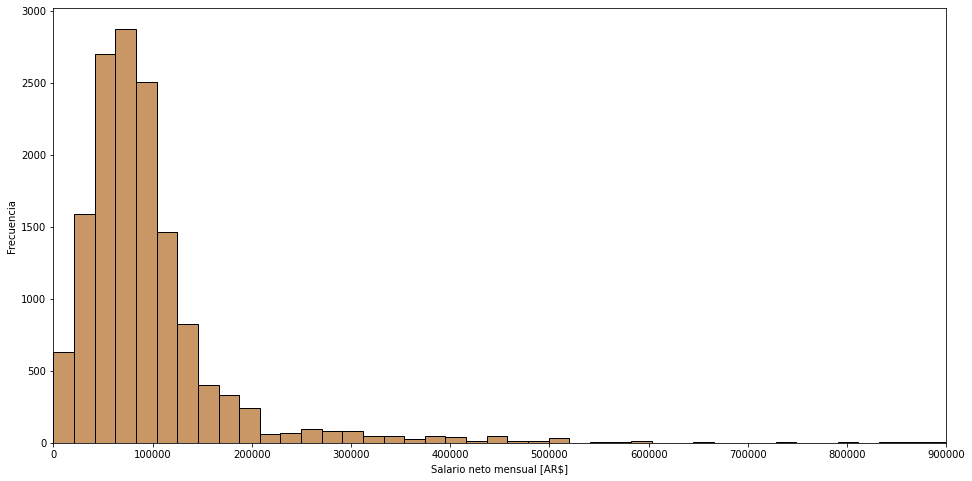

In [10]:
# Graficamos.
fig = plt.subplots(figsize=(16, 8))
plt.xlim([0,900000]) # Por cuestiones de visualización limitamos el eje X a 900 mil.
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombraos el eje Y.
seaborn.histplot(df_lang_drop_age['salary_monthly_NETO'], bins=100, color='#B87333')

A simple vista se ve que los salarios se concentran en un rango de entre 0 y 200,000 pesos argentinos. Vamos a quitar los outliers que ganan más que el 95% de la muestra.

El **percentil 95** se escoge iterando y notando que otros percentiles usuales, como el 99 o el 90, tenían poco o mucho efecto, respectivamente, sobre la muestra.

<AxesSubplot:xlabel='Salario neto mensual [AR$]', ylabel='Frecuencia'>

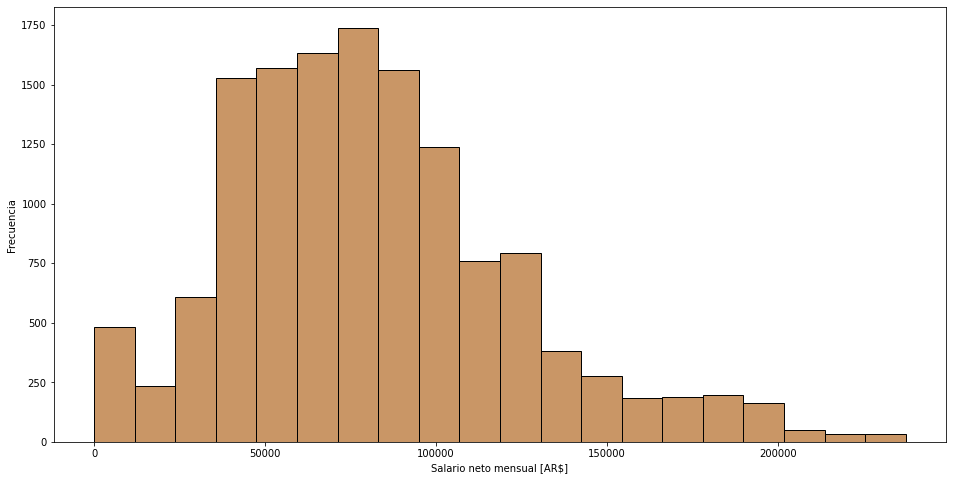

In [11]:
# Filtramos salarios mayores al 95% de las muestras.
df_lang_drop_age_filtered = \
    df_lang_drop_age[df_lang_drop_age['salary_monthly_NETO'] < \
                            df_lang_drop_age['salary_monthly_NETO'].quantile(95 / 100)]

# Graficamos.
fig = plt.subplots(figsize=(16, 8))
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombraos el eje Y.
seaborn.histplot(df_lang_drop_age_filtered['salary_monthly_NETO'], bins=20, color='#B87333')

Bien, ahora está más uniforme. Como la pregunta es sobre los lenguajes de programación asociados a los mejores salarios se podría interpretar que los peores salarios no deberíamos considerarlos (y es lo que hacemos). 

Los peores salarios pueden corresponder a los están por debajo de la media. **Vamos entonces a filtrar una vez más nuestro dataset para sólo tener en consideración aquellos salarios, de los que quedan, que son más altos que el 50%.**

/var/folders/0b/tqp6hx2n3pqcpv6qt7zrhdqh0000gn/T/ipykernel_33975/4075090916.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean = df_clean.drop('index', 1)


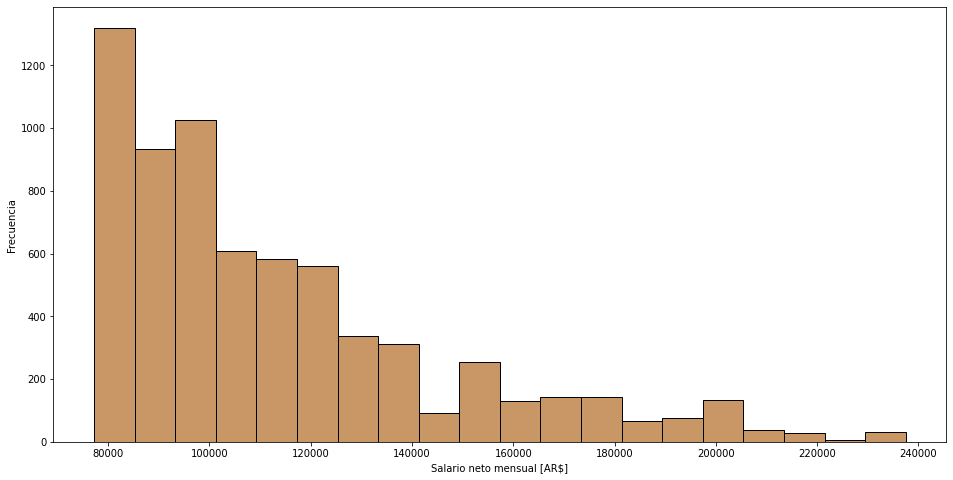

In [12]:
# Filtramos salarios menores al 25% de la muestra.
df_lang_drop_age_filtered_2 = \
    df_lang_drop_age_filtered[df_lang_drop_age_filtered['salary_monthly_NETO'] \
                          > df_lang_drop_age_filtered['salary_monthly_NETO'].quantile(50 / 100)]

# Graficamos.
fig = plt.subplots(figsize=(16, 8))
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Frecuencia") # Renombraos el eje Y.
seaborn.histplot(df_lang_drop_age_filtered_2['salary_monthly_NETO'], bins=20, color='#B87333')

# El nombre quedó bastante complicado. Vamos a simplificarlo!
df_clean = df_lang_drop_age_filtered_2

# Vamos a restartear el índice para que quede realmente limpio.
df_clean = df_clean.reset_index()
df_clean = df_clean.drop('index', 1)

#### Análisis de los datos tratados <a class="anchor" id="Análisis2"></a>
---
Ahora sí estamos en condiciones de comenzar a hacer un análisis sobre sueldos en función del lenguaje de programación, la edad y el género! 

Pero para empezar vamos a ver sólamente los sueldos en función del lenguaje de programación. Un gráfico que podemos usar es el **boxenplot**, que es un gráfico de caja y bigotes power que nos da más información.

También vamos a generar tablas con los valores exactos de el cuartil 1, 2 (que coincide con la mediana) y 3.

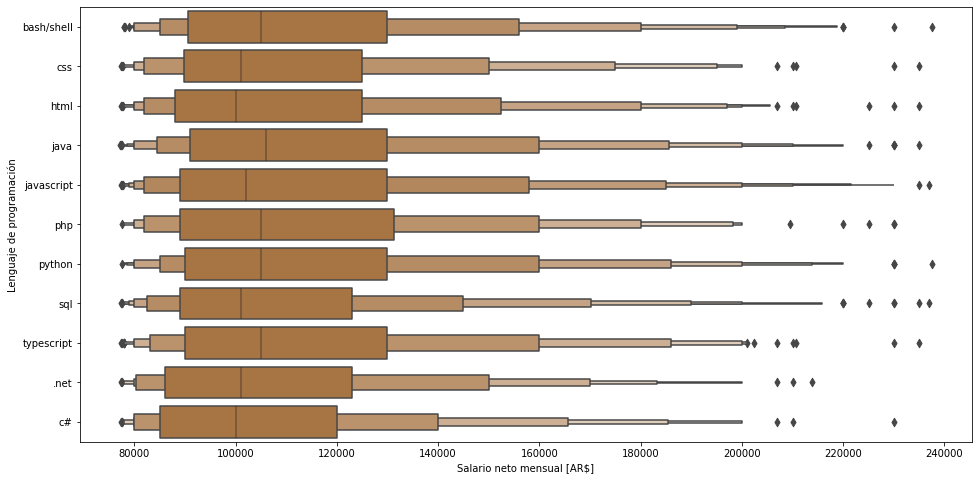

In [13]:
#Graficamos!
plt.figure(figsize=(16, 8))
plt.xlabel("Salario neto")
seaborn.boxenplot(data=df_clean, x='salary_monthly_NETO', y='programming_language',
                color='#B87333')
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Lenguaje de programación") # Renombraos el eje Y.
plt.ticklabel_format(style='plain', axis='x')

In [14]:
print("Salario por lenguaje de programación")
print("------------------------------------\n")
print("CUARTIL 1")
print(df_clean[['programming_language','salary_monthly_NETO']].\
      groupby('programming_language').quantile(25 / 100),"\n")
print("CUARTIL 2")
print(df_clean[['programming_language','salary_monthly_NETO']].\
      groupby('programming_language').quantile(50 / 100),"\n")
print("CUARTIL 3")
print(df_clean[['programming_language','salary_monthly_NETO']].\
      groupby('programming_language').quantile(75 / 100),"\n")

Salario por lenguaje de programación
------------------------------------

CUARTIL 1
                      salary_monthly_NETO
programming_language                     
.net                              86000.0
bash/shell                        90600.0
c#                                85052.0
css                               89850.0
html                              88000.0
java                              91000.0
javascript                        89000.0
php                               89000.0
python                            90000.0
sql                               89000.0
typescript                        90000.0 

CUARTIL 2
                      salary_monthly_NETO
programming_language                     
.net                             101000.0
bash/shell                       105000.0
c#                               100000.0
css                              101000.0
html                             100000.0
java                             106000.0
javascript           

Lo primero que notamos es que el gráfico está muy bueno. Después de salir del asombro inicial, podemos notar que de la información que ofrece se desprende que está todo muy parecido. No hay UN lenguaje que se desprenda totalmente del resto para que uno pueda decir quiero (o no quiero) aprenderlo. Sin embargo, Viendo con ayuda de las tablas de los cuartiles podemos decir, por ejemplo:
- El salario neto del cuartil 1 más bajo es para el lenguaje **C#**. Esto significa que el 25% que menos gana de los programadores C# gana menos que cualquiera del 75% que más gana de todo el resto de los lenguajes.
- La mediana (y el cuartil 1) del salario neto más alto es para el lenguaje **Java**. El más bajo es para **C#**.
- En el tercer cuartil **PHP** se corona con el salario más alto, mientras que **C#** vuelve a quedar último.

Para continuar con el análisis de los mejores salarios de este subconjunto (lenguaje y salario, únicamente) vamos a tomar el 25% que más gana y vamos a ver qué porcentaje de este 25% se corresponde con qué lenguaje.

Sin embargo, como quizás algunos lenguajes aparecerán más simplemente porque son más usados vamos a dividir la frecuencia en el top 25% por la frecuencia en el 100%.

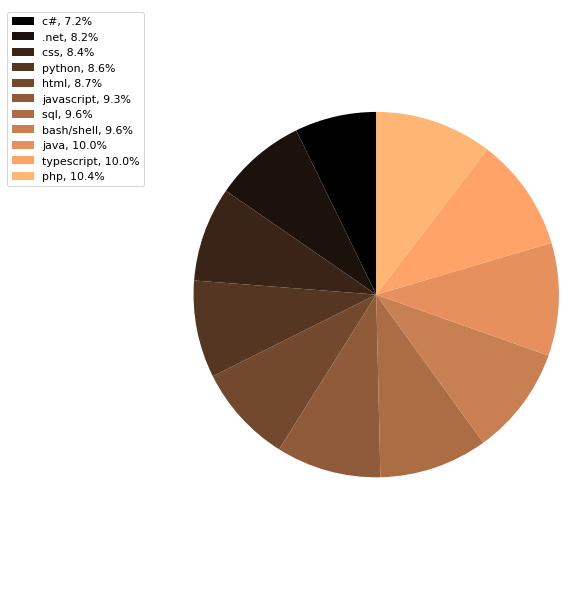

In [15]:
# Filtramos una vez más para quedarnos con el 25% que más gana de nuestro conjunto.
df_clean_top25 = \
    df_clean[df_clean['salary_monthly_NETO'] \
                            > df_clean['salary_monthly_NETO'].quantile(75 / 100)]

# El 25% mejor pago.
top25 = df_clean_top25.programming_language.value_counts().reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Todo el conjunto.
top100 = df_clean.programming_language.value_counts().reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Ordenamos de la misma manera ambos top.
top25 = top25.sort_values(by=['language'])
top100 = top100.sort_values(by=['language'])

top25_normalized = top25
top25_normalized['frequency'] = top25['frequency'] / top100['frequency']
top25_normalized = top25_normalized.sort_values(by=['frequency'])

# Graficamos.
sizes = top25_normalized['frequency']
labels = top25_normalized['language']
 
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

De esta manera el lenguaje que más participación tiene en el top 25%, en función a la participación total, es **PHP**, seguido por **TypeScript** y **Java**. **C#** vuelve a quedar en último lugar.

Ahora veamos el efecto de ser hombre, mujer o no-binario sobre los salarios que percibe cada lenguaje de programación. También veamos el porcentaje que representa cada uno de los géneros sobre el total.

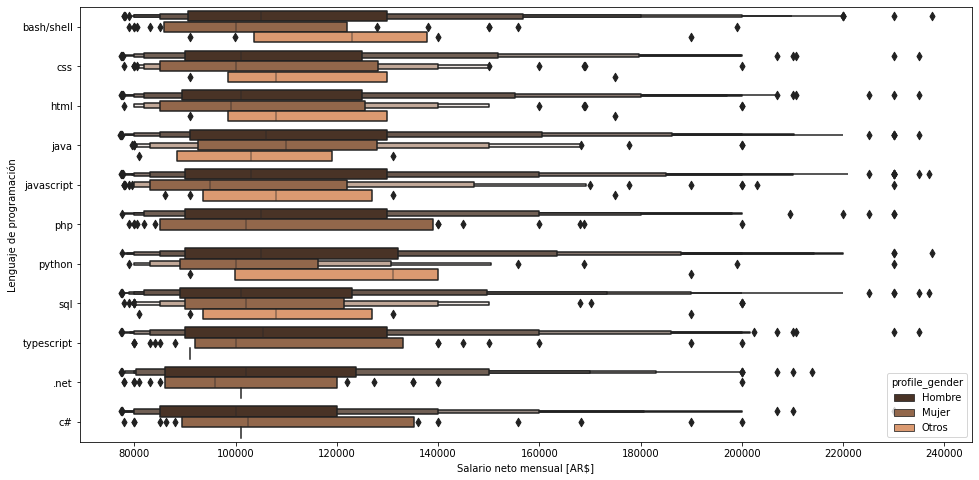

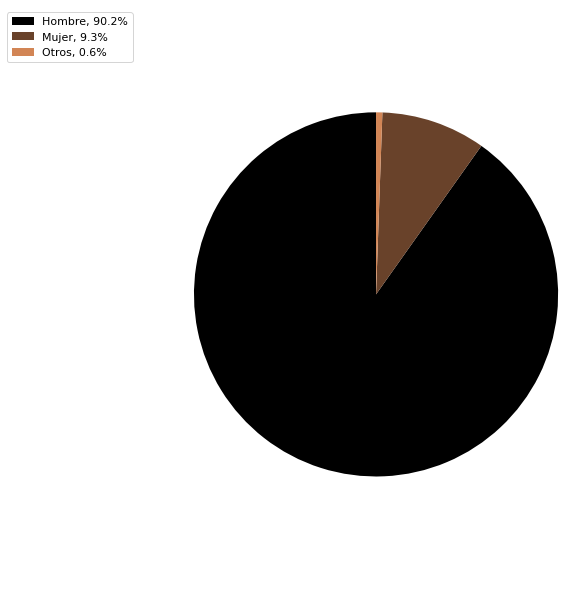

In [16]:
# Graficamos!
plt.figure(figsize=(16, 8))
plt.xlabel("Salario neto")
seaborn.boxenplot(data=df_clean, x='salary_monthly_NETO', y='programming_language', \
                  hue='profile_gender', palette="copper")
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Lenguaje de programación") # Renombraos el eje Y.
plt.ticklabel_format(style='plain', axis='x')

# Graficamos.
gender_freq = df_clean['profile_gender'].value_counts()

sizes = [gender_freq[0],gender_freq[1],gender_freq[2]]
labels = df_clean['profile_gender'].unique()
 
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

De los 11 lenguajes de programación, en 8 de ellos la mediana del salario de los hombres es mayor a la mediana del salario de las mujeres. Además, las mujeres son menos del 10% de la muestra. De todos modos, la mediana del salario más alto corresponde al lenguaje **Java** y el género **Mujer**.

Quienes se identifican como **no-binarios** no están presentes en todos los lenguajes de programación, pero en los que están solo en uno de ellos tienen una mediana de salario más baja que sus contrapartes que se identifican como Hombres o Mujeres.

Veamos ahora cómo se distribuye esto sólo teniendo en cuenta al 25% que más gana.

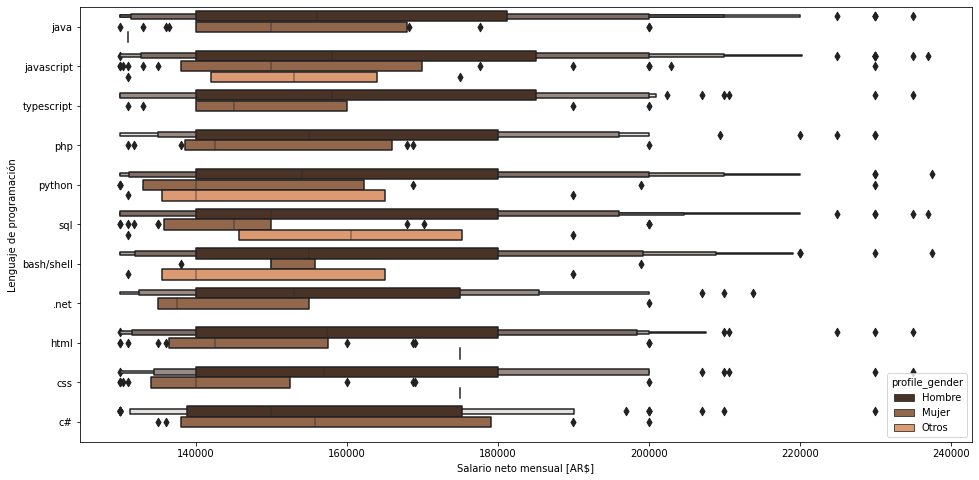

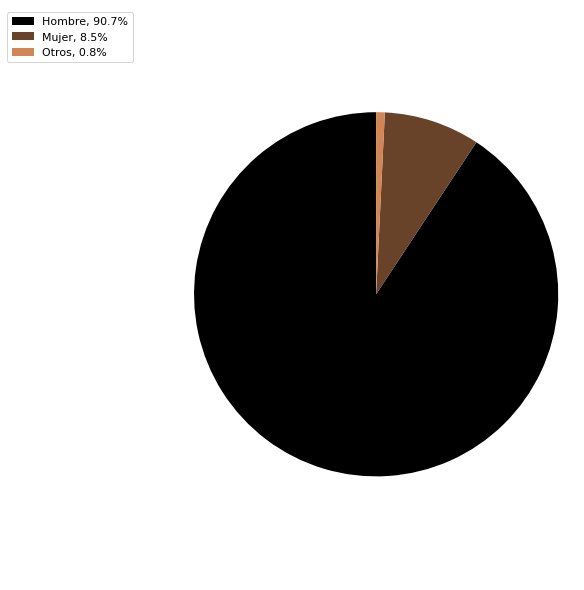

In [17]:
# Graficamos!
plt.figure(figsize=(16, 8))
plt.xlabel("Salario neto")
seaborn.boxenplot(data=df_clean_top25, x='salary_monthly_NETO', y='programming_language', \
                  hue='profile_gender', palette="copper")
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Lenguaje de programación") # Renombraos el eje Y.
plt.ticklabel_format(style='plain', axis='x')

# Graficamos.
gender_freq = df_clean_top25['profile_gender'].value_counts()

sizes = [gender_freq[0],gender_freq[1],gender_freq[2]]
labels = df_clean_top25['profile_gender'].unique()
 
fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

En el top 25% que más gana la fracción de mujeres que hay se reduce. Además la mediana de los salarios de los hombres es superior al de las mujeres en 10 de 11 lenguajes de programación. En este caso la mediana más alta corresponde a los **Hombres** que trabajan con **JavaScript** y **TypeScript**

Quienes respondieron que su género no era ni Hombre ni Mujer tienen aún menos participación en el análisis del top 25%, sólo estando presentes en 4 de 11 lenguajes de programación y con muy pocos datos.

Ahora vamos a ver cómo las edades de las personas que respondieron la encuesta afectan el lenguaje de programación y su salario mensual neto. Dividiremos las edades en bloques de la siguiente manera:
- Entre 18 y 25 años: **18-25**.
- Entre 26 y 35 años: **26-35**.
- Entre 36 y 50 años: **36-50**.
- Mayores de 51 años: **51-67**.

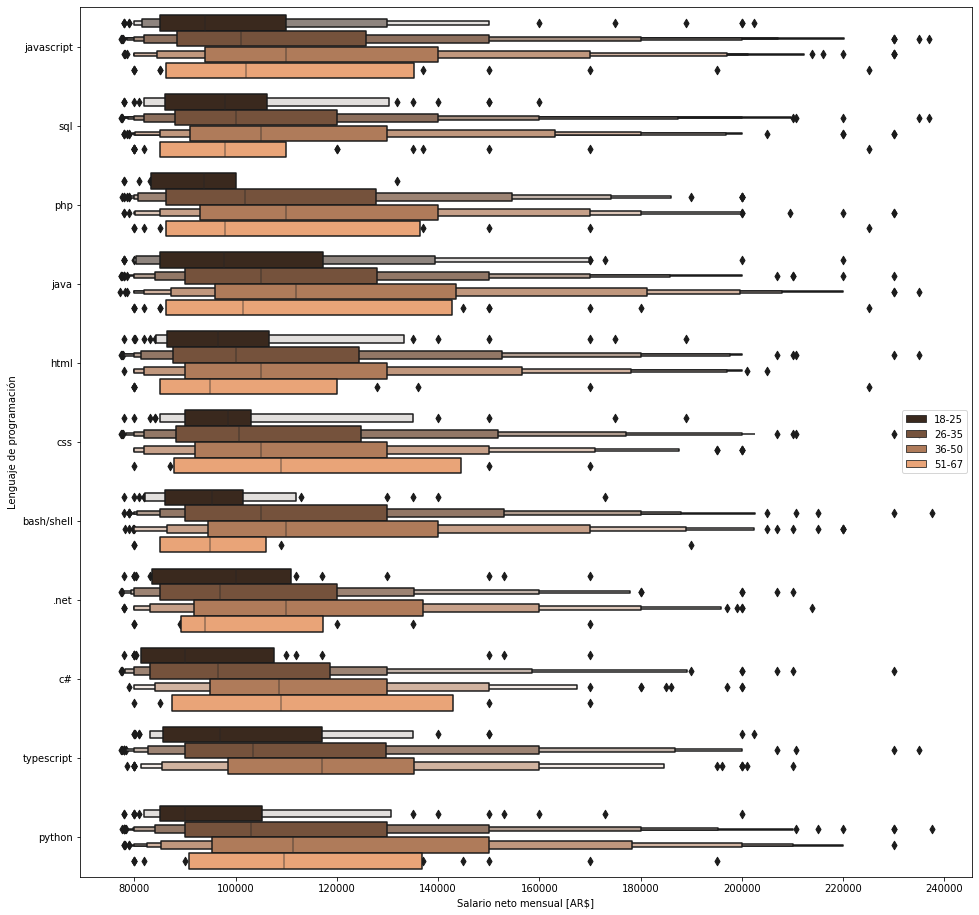

In [18]:
# Primero tenemos que escribir una función que a partir de profile_age obtenga el
# profile_age_label que vamos a utilizar.
def labeling(row):
    if row['profile_age'] <= 25:
        return "18-25"
    elif row['profile_age'] <= 35:
        return "26-35"
    elif row['profile_age'] <= 50:
        return "36-50"
    else:
        return "51-67"
    
# Aplicamos esto a nuestro dataframe.
df_clean['profile_age_label'] = df_clean.apply(lambda row: labeling(row), axis=1)
df_clean = df_clean.sort_values(by=['profile_age_label'])

# Graficamos!
plt.figure(figsize=(16, 16))
plt.xlabel("Salario neto")
seaborn.boxenplot(data=df_clean, x='salary_monthly_NETO', y='programming_language', \
                  hue='profile_age_label', palette="copper")
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Lenguaje de programación") # Renombraos el eje Y.
plt.ticklabel_format(style='plain', axis='x')
plt.legend(loc='right')

Que parece más complicado de interpretar que los anteriores pero que básicamente dice que para la mayoría de los lenguajes de programación el aumento en la edad significa un aumento en el sueldo. 

En 8 de los 11 casos tener más de 51 años tiene un efecto contrario, pero hasta los 50 años el efecto es acumulativo, esto puede llegar a deberse a que quienes tienen más de 51 años no programan en los lenguajes más populares de la actualidad (con los que se confeccionó esta tabla "limpia" siguiendo el Principio de Pareto).

De este gráfico se puede extraer información sobre qué lenguaje es más redituable dependiendo del rango etario:
- 18-25: **.Net**.
- 26-35: **Java**.
- 36-50: **TypeScript**.
- 51-67: **Python**.

Finalmente vamos a analizar la relacióne entre el nivel de estudios alcanzados, el lenguaje de programación y el salario neto.

Para esto lo primero que vamos a hacer es reducir las opciones de **profile_studies_level** de 7 a 3:
- 1: Primario - Secundario - Terciario
- 2: Universitario - Posgrado
- 3: Doctorado - Posdoctorado

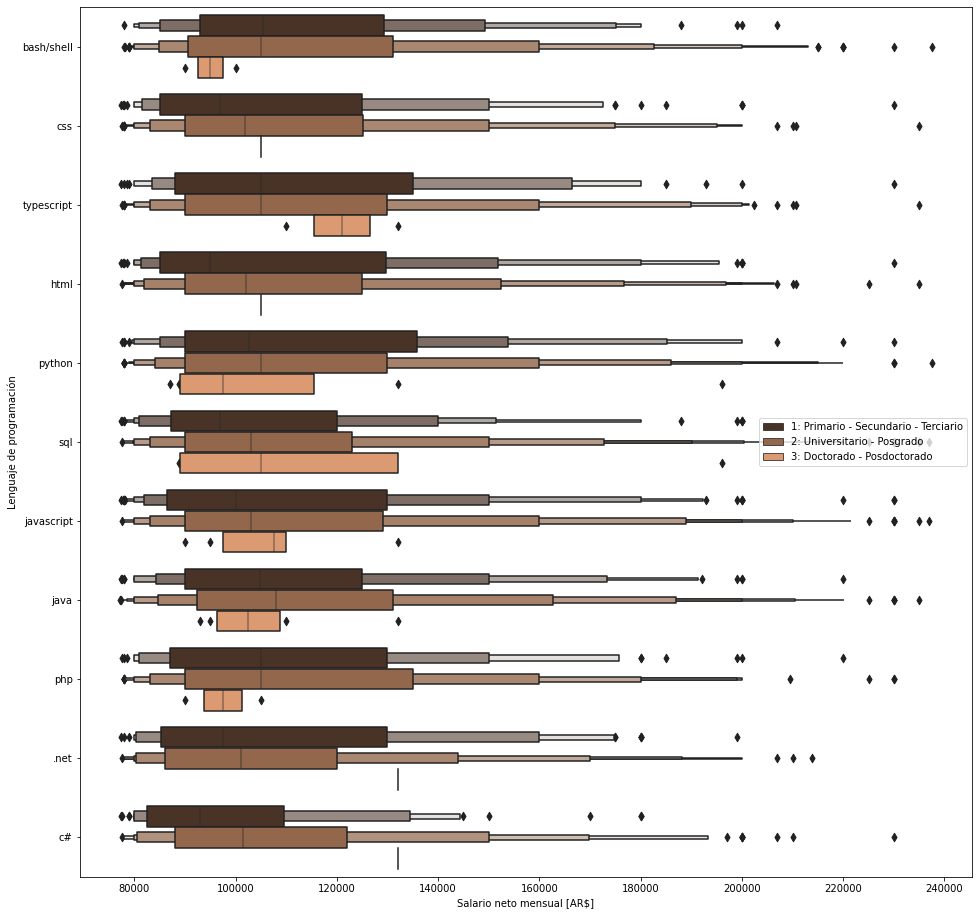

In [19]:
# Primero tenemos que escribir una función que a partir de profile_studies_level obtenga el
# profile_studies_label que vamos a utilizar.
def labeling(row):
    if (row['profile_studies_level'] == "Primario") or (row['profile_studies_level'] == "Secundario") or (row['profile_studies_level'] == "Terciario"):
        return "1: Primario - Secundario - Terciario"
    elif (row['profile_studies_level'] == "Universitario") or (row['profile_studies_level'] == "Posgrado"):
        return "2: Universitario - Posgrado"
    else:
        return "3: Doctorado - Posdoctorado"
    
# Aplicamos esto a nuestro dataframe.
df_clean['profile_studies_label'] = df_clean.apply(lambda row: labeling(row), axis=1)
df_clean = df_clean.sort_values(by=['profile_studies_label'])

# Graficamos!
plt.figure(figsize=(16, 16))
plt.xlabel("Salario neto")
seaborn.boxenplot(data=df_clean, x='salary_monthly_NETO', y='programming_language', \
                  hue='profile_studies_label', palette="copper")
plt.xlabel("Salario neto mensual [AR$]") # Renombramos el eje X.
plt.ylabel("Lenguaje de programación") # Renombraos el eje Y.
plt.ticklabel_format(style='plain', axis='x')
plt.legend(loc='right')

En 8 de 11 lenguajes de programación haber hecho estudios Universitarios o de Posgrado tiene un efecto positivo en el los ingresos netos. En los otros 3, es indiferente. Los casos de Doctorados o Posdoctorados son pocos y no están presentes en todos los casos. No se puede ver una tendencia clara sobre el efecto en los salarios, ya que hay casos donde ganan más, lo mismo o incluso menos que quienes no se doctoraron.

#### Conclusiones <a class="anchor" id="Conclusiones"></a>
---
Viendo los datos tratados, simplemente contrastando lenguaje contra el salario podemos decir que no hay UN lenguaje que se desprenda totalmente del resto para que uno pueda decir quiero (o no quiero) aprenderlo. De todos modos podemos decir:
- El salario neto del cuartil 1 más bajo es para el lenguaje C#. Esto significa que el 25% que menos gana de los programadores C# gana menos que cualquiera del 75% que más gana de todo el resto de los lenguajes.
- La mediana (y el cuartil 1) del salario neto más alto es para el lenguaje Java. El más bajo es para C#.
- En el tercer cuartil PHP se corona con el salario más alto, mientras que C# vuelve a quedar último.

Analizando el último cuartil de los salarios el lenguaje que más participación tiene (en relación a su participación total) es **PHP**, seguido por **TypeScript** y **Java**. **C#** vuelve a quedar en último lugar.

Sumando el género de los participantes vemos que de los 11 lenguajes de programación, en 8 de ellos la mediana del salario de los hombres es mayor a la mediana del salario de las mujeres. Además, las mujeres son menos del 10% de la muestra. De todos modos, la mediana del salario más alto corresponde al lenguaje **Java** y el género **Mujer**. Quienes se identifican como no-binarios no están presentes en todos los lenguajes de programación, pero en los que están solo en uno de ellos tienen una mediana de salario más baja que sus contrapartes que se identifican como Hombres o Mujeres.

En el último cuartil, la fracción de mujeres que hay se reduce. Además la mediana de los salarios de los hombres es superior al de las mujeres en 10 de 11 lenguajes de programación. En este caso la mediana más alta corresponde a los **Hombres** que trabajan con **JavaScript** y **TypeScript**. Quienes respondieron que su género no era ni Hombre ni Mujer tienen aún menos participación en el análisis del top 25%, sólo estando presentes en 4 de 11 lenguajes de programación y con muy pocos datos.

Luego, si contemplamos, además del lenguaje de programación, a la edad para la mayoría de los lenguajes de programación el aumento en la edad significa un aumento en el sueldo.
En 8 de los 11 casos tener más de 51 años tiene un efecto contrario dentro de la tendencia, pero hasta los 50 años el efecto es acumulativo. Esto puede llegar a deberse a que quienes tienen más de 51 años no programan en los lenguajes más populares de la actualidad (con los que se confeccionó esta tabla "limpia" siguiendo el Principio de Pareto).

Se puede extraer información sobre qué lenguaje es más redituable dependiendo del rango etario:
- 18-25: .Net.
- 26-35: Java.
- 36-50: TypeScript.
- 51-67: Python.

Finalmente, en 8 de 11 lenguajes de programación haber hecho estudios Universitarios o de Posgrado tiene un efecto positivo en el los ingresos netos. En los otros 3, es indiferente. Los casos de Doctorados o Posdoctorados son pocos y no están presentes en todos los casos. No se puede ver una tendencia clara sobre el efecto en los salarios, ya que hay casos donde ganan más, lo mismo o incluso menos que quienes no se doctoraron.

Por último, vamos a exportar el dataframe limpio para poder usarlo en los próximos notebooks.

In [20]:
df_clean.to_csv("clean.csv")